In [ ]:
import requests
import pandas as pd

url = 'https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Census%20Income/adult.data.csv'
response = requests.get(url)
data = response.text

with open('adult.data.csv', 'w') as f:
    f.write(data)

df_original = pd.read_csv('adult.data.csv', header=None)

# cols

df_original.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df= df_original.copy()
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Motivacion**: El estudio alrededor de caracteristicas socioeconomicas y demograficas en la actualidad donde existen gran variedad de culturas y la relacion de esta al impacto en la sociedad.

**Exploracion de datos** \\
Partiendo por datos generales del data frame

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Primero, queremos asignar a cada fila un id único

In [ ]:
filas_duplicadas = len(df)-len(df.drop_duplicates())
filas_duplicadas

24

In [ ]:
df_id = df.copy()

df_id.insert(loc=0, column='id', value=range(0,len(df)))
df_id.sample(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
979,979,34,Private,159929,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
23972,23972,47,Private,365516,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
17987,17987,56,Private,133025,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
16686,16686,23,Private,216889,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
10237,10237,37,Private,110713,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
26687,26687,34,?,310525,HS-grad,9,Married-civ-spouse,?,Husband,Black,Male,0,0,10,United-States,<=50K
1707,1707,32,?,158784,7th-8th,4,Widowed,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
4334,4334,41,Local-gov,137142,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
9176,9176,20,Private,188612,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,38,Nicaragua,<=50K
17034,17034,21,Private,129980,9th,5,Never-married,Transport-moving,Own-child,White,Male,0,0,40,United-States,<=50K


In [ ]:
filas_duplicadas_id = len(df_id)-len(df_id.drop_duplicates())
filas_duplicadas_id

0

**Agregacion a hours_per_week de <=40 y >40 como la media**

In [ ]:
df_id.loc[df_id['hours_per_week']<=40, 'hours_per_week'] = '<=40'
df_id.loc[df_id['hours_per_week']!='<=40' , 'hours_per_week'] = '>40'

df_id.head(10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,<=40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,<=40,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,<=40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,<=40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,<=40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,<=40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,<=40,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,>40,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,>40,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,<=40,United-States,>50K


In [ ]:
df_id_work = df_id[df_id['native_country']=='United-States']

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [ ]:
df_id.groupby(['hours_per_week'])['hours_per_week'].count().sort_values(ascending = False)

hours_per_week
<=40    22980
>40      9581
Name: hours_per_week, dtype: int64

In [ ]:
df_id.groupby(['race'])['race'].count().sort_values(ascending = False)

NameError: name 'df_id' is not defined

In [ ]:
df_id.groupby(['native_country'])['native_country'].count().sort_values(ascending = False)

native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [ ]:
df_id.groupby(['workclass'])['workclass'].count().sort_values(ascending = False)

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_id.groupby(['income'])['income'].count().sort_values(ascending = False)

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
df_id['fnlwgt'].min()

12285

In [ ]:
df_id['fnlwgt'].max()

1484705

**REDUCIR CAPITAL_GAIN Y CAPITAL_LOSS A CAPITAL_TOTAL** \
**REDUCIR EDUCATION Y EDUCATION_NUM A EDUCATION???**

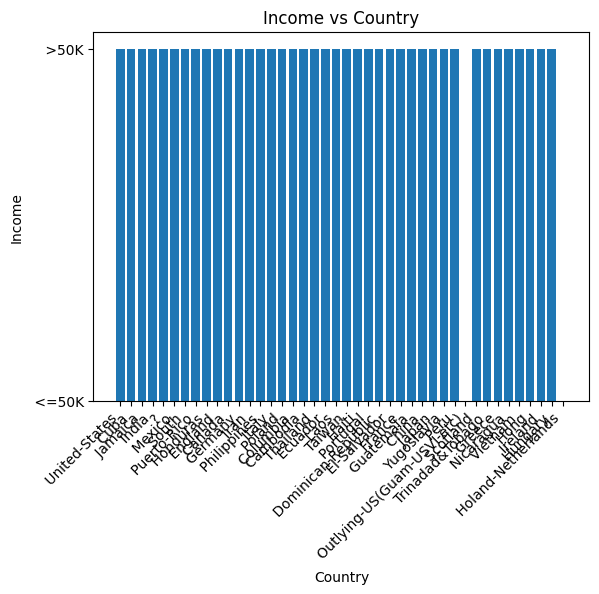

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_dinero = df[(df[''])]

# Crear un gráfico de barras
plt.bar(df['native_country'], df['income'])

# Establecer etiquetas de los ejes
plt.xlabel('Country')
plt.ylabel('Income')

# Establecer título
plt.title('Income vs Country')

# Rotar etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

['<=50K' '>50K']
[0 1]


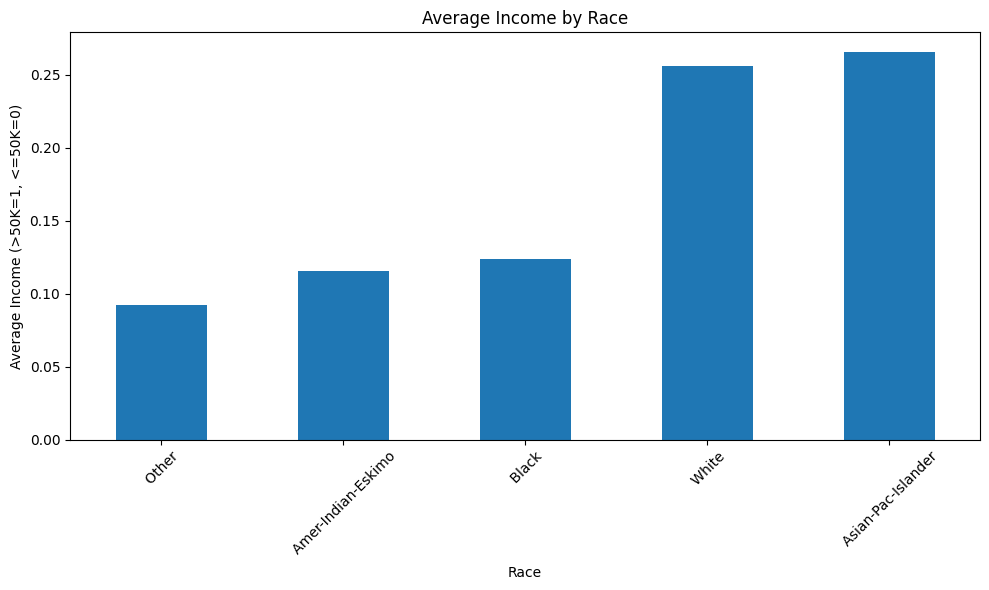

In [ ]:

print(df_combined['income'].unique())
df_combined['income'] = df_combined['income'].str.strip()
df_combined['income_int'] = df_combined['income'].map({'>50K': 1, '<=50K': 0})
print(df_combined['income_int'].unique())
race_income_group = df_combined.groupby('race')['income_int'].mean().sort_values()

plt.figure(figsize=(10, 6))
race_income_group.plot(kind='bar')
plt.title('Average Income by Race')
plt.xlabel('Race')
plt.ylabel('Average Income (>50K=1, <=50K=0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

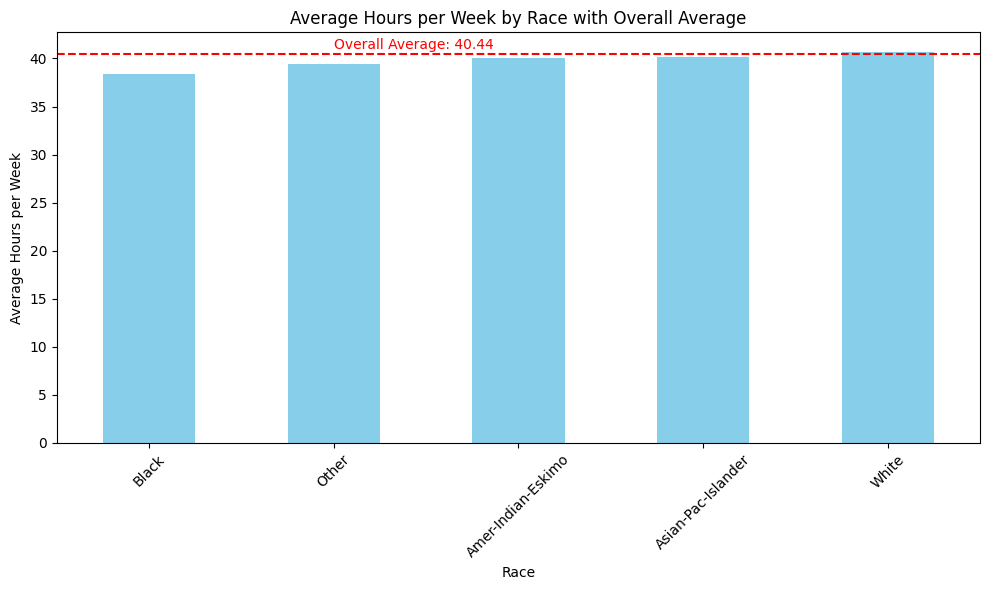

In [ ]:
import matplotlib.pyplot as plt


overall_avg_hours = df_combined.iloc[:, 12].mean()

plt.figure(figsize=(10, 6))
race_hours_group.plot(kind='bar', color='skyblue')
plt.axhline(overall_avg_hours, color='red', linestyle='--')
plt.text(1, overall_avg_hours + 0.5, f'Overall Average: {overall_avg_hours:.2f}', color='red')
plt.title('Average Hours per Week by Race with Overall Average')
plt.xlabel('Race')
plt.ylabel('Average Hours per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

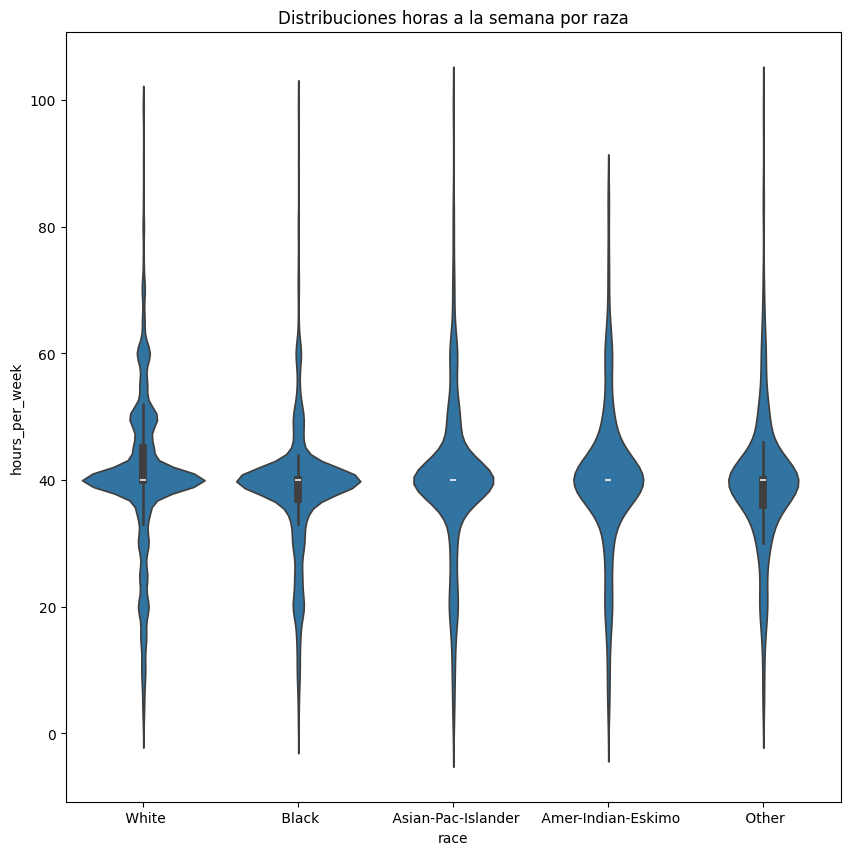

In [ ]:
# hours vs race
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.violinplot(x='race', y='hours_per_week', data=df)
plt.title('Distribuciones horas a la semana por raza')
plt.show()

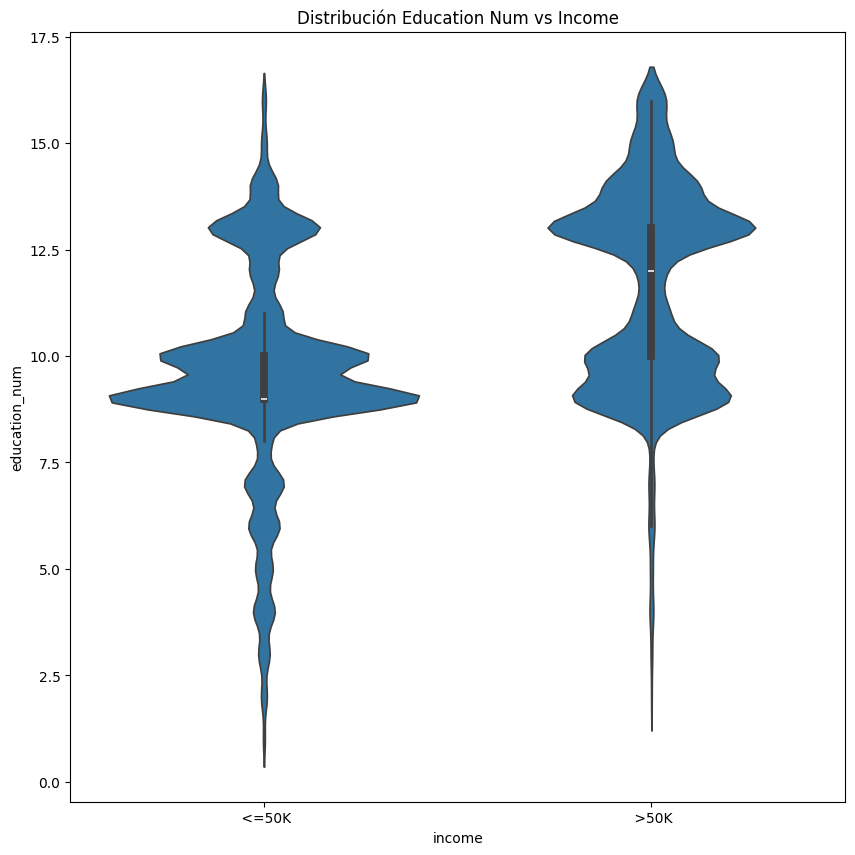

In [ ]:
# violin plot education num vs income
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.violinplot(x='income', y='education_num', data=df)
plt.title('Distribución Education Num vs Income')
plt.show()